In [42]:
import csv
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from numpy import linalg as LA # norm computations
from numpy.linalg import inv # inverse
import random
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

## Importation of the datas

In [43]:
# Data frame que l'on va étudier 
results = pd.read_csv('archive3.csv')
results = results.dropna()
results.dtypes, results.shape

(Unnamed: 0      int64
 carat         float64
 cut            object
 color          object
 clarity        object
 depth         float64
 table         float64
 price           int64
 x             float64
 y             float64
 z             float64
 dtype: object,
 (53940, 11))

In [44]:
# Info on the variable to predict
results["price"].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

## Histograms

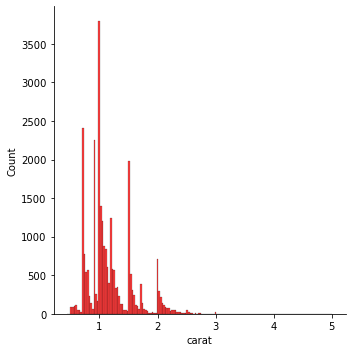

In [123]:
results_copy = results

# Separate expensive and cheap player 

results_copy['resource_id'] = ["Expensive" if s >=2401 else "Cheap" for s in results_copy["price"]]
results.e = results_copy.drop(results_copy[results_copy.resource_id =="Expensive"].index)
results.c =results_copy.drop(results_copy[results_copy.resource_id =="Cheap"].index)

# Display of high correlated variables according to their price category

sns.displot(results.c["carat"], color = "red")

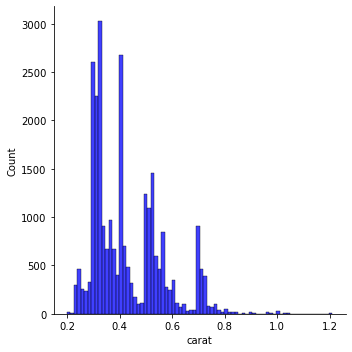

In [124]:
sns.displot(results.e["carat"], color = "blue")

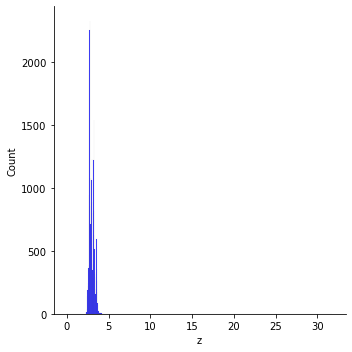

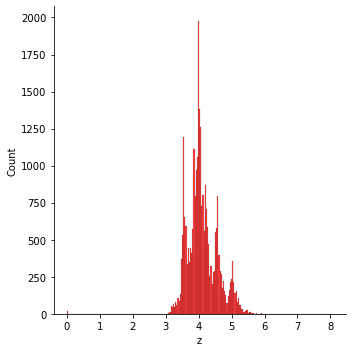

In [125]:
sns.displot(results.e["z"], color = "blue")
sns.displot(results.c["z"], color = "red")

## Presentation of the data set

In [126]:
# Correlation matrix
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = results.corr()
corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.00,-0.38,-0.03,-0.10,-0.31,-0.41,-0.40,-0.40
carat,-0.38,1.00,0.03,0.18,0.92,0.98,0.95,0.95
depth,-0.03,0.03,1.00,-0.30,-0.01,-0.03,-0.03,0.09
table,-0.10,0.18,-0.30,1.00,0.13,0.20,0.18,0.15
price,-0.31,0.92,-0.01,0.13,1.00,0.88,0.87,0.86
x,-0.41,0.98,-0.03,0.20,0.88,1.00,0.97,0.97
y,-0.40,0.95,-0.03,0.18,0.87,0.97,1.00,0.95
z,-0.40,0.95,0.09,0.15,0.86,0.97,0.95,1.00


## Separation Test/Train and cleaning of the dataset

In [127]:
df_train = results.sample(frac=0.8, random_state=1)
df_test=results.drop(df_train.index)

In [128]:
X_train = df_train[["carat","depth","x","y","z"]]
X_test = df_test[["carat","depth","x","y","z"]]
y_train = df_train["price"]
y_test = df_test["price"] 

In [129]:
# Normalize
means = [np.mean(X_train), np.mean(X_test), np.mean(y_train), np.mean(y_test)]
sd = [np.std(X_train), np.std(X_test), np.std(y_train), np.std(y_test)]

X_train = (X_train - np.mean(X_train)) / np.std(X_train)
X_test = (X_test - np.mean(X_test)) / np.std(X_test)
y_train = (y_train - np.mean(y_train)) / np.std(y_train)
y_test = (y_test - np.mean(y_test)) / np.std(y_test)

In [130]:
# Intercept
n_train = X_train.shape[0]
n_test = X_test.shape[0]
X_train["Intercept"] = [1]*n_train
X_test["Intercept"] = [1]*n_test

In [131]:
X_train = X_train[["Intercept","carat","x","y","z"]]
X_test = X_test[["Intercept","carat","x","y","z"]]

In [132]:
# Dataframe to matrice
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

## Regression with GD

In [133]:
def f(X, y, theta):
    m = len(y)
    return np.sum((X.dot(theta)-y)**2)/2/m

In [134]:
def df(X,y,theta) : 
    m = len(y)
    hypothesis = X.dot(theta)
    loss = hypothesis-y
    gradient = X.T.dot(loss)/m
    return gradient

In [135]:
def hypothesis(xi,theta):
    '''
    xi : 1xd
    theta= 1xd
    '''
    s = 0
    for j in range(len(theta)):
        s += xi[j]*theta[j]
    return s

In [136]:
def cost_function(X, y, theta):
    """
    cost_function(X, y, theta) computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y
    """
    ## number of training examples
    m = len(y) 
    
    ## Calculate the cost with the given parameters
    J = np.sum((X.dot(theta)-y)**2)/2/m
    
    return J

In [137]:
def gradient_descent(X, y, theta, alpha, iterations = 1500):
    
    m = len(y)
    cost_history = [0] * iterations
    cost_history[0] = cost_function(X, y, theta)
    nb_iter = 0 
    old_theta = theta.copy()+1
    
    for iteration in range(1,iterations):
        old_theta, theta = theta, theta - alpha*df(X,y,theta)
            
        cost = cost_function(X, y, theta)
        cost_history[iteration] = cost
        nb_iter += 1
            
    return theta, cost_history, nb_iter

In [138]:
# Compute max & min eigenvalues
eigen_value, eigen_vect = LA.eig((1/n_train)*np.dot(np.transpose(X_train),X_train))
L = max(eigen_value)
mu = min(eigen_value)
theta_o = np.random.random(5)

For alpha = 1/L :
coefficiant :  [-0.0, 1.212, -0.243, 0.042, -0.097]
number of iteration :  1499
MSE : 0.14617690506848777 



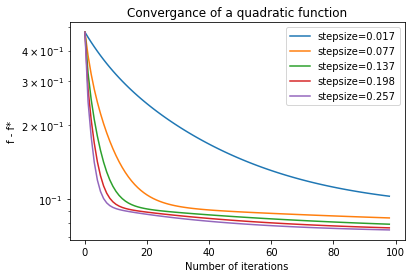

In [139]:
# Test for constant stepsize

#Initialization
alpha = 1/L

# GD 
theta_star, cost, nb_iter = gradient_descent(X_train,y_train,theta_o,alpha)
ypred = [X_test[i,:].dot(theta_star) for i in range(n_test)]

print("For alpha = 1/L :")
print("coefficiant : ", [round(ele,3) for ele in theta_star])
print("number of iteration : ", nb_iter)
print("MSE :",mean_squared_error(ypred,y_test),"\n")


#Plot 
Alpha = np.linspace(mu, 1/L ,5)
Alpha[4] = 1/(mu + L)

for alpha in Alpha:
    theta_star, cost, nb_iter = gradient_descent(X_train,y_train,theta_o,alpha,iterations=100)
    ypred = [X_test[i,:].dot(theta_star) for i in range(n_test)]
    plt.semilogy([i for i in range(nb_iter)],[cost[i] for i in range(nb_iter)],label=f"stepsize={round(alpha,3)}")
    plt.legend()
    plt.title("Gradient descent with various stepsizes",fontsize=16)


plt.title("Convergance of a quadratic function")
plt.xlabel('Number of iterations')
plt.ylabel('f - f*')
plt.show()

## Backtracking

In [140]:
def backstracking(theta, alpha, grad, r):
    while f(X_train, y_train, theta - alpha*grad) > f(X_train, y_train, theta) : alpha = r*alpha
    return alpha

In [141]:
def gd_back(X, y, theta, alpha, iterations = 1500):
    
    m = len(y)
    cost_history = [0] * iterations
    cost_history[0] = cost_function(X, y, theta)
    nb_iter = 0 
    old_theta = theta.copy()+1
    
    for iteration in range(1,iterations):
        grad = df(X_train, y_train, theta)
        alpha = backstracking(theta, alpha, grad, 1/2)
        old_theta, theta = theta, theta - alpha*df(X,y,theta)
            
        cost = cost_function(X, y, theta)
        cost_history[iteration] = cost
        nb_iter += 1
            
    return theta, cost_history, nb_iter

In [142]:
theta_bs, cost_history_bs, nb_iter_bs = gd_back(X_train, y_train, theta_o, 1/L, iterations = 1500)

ypred_bs = [X_test[i,:].dot(theta_bs) for i in range(n_test)]

print("coefficiant : ", [round(ele,3) for ele in theta_bs])
print("number of iteration : ", nb_iter_bs)
print("MSE :",mean_squared_error(ypred_bs,y_test),"\n")

coefficiant :  [-0.0, 1.212, -0.243, 0.042, -0.097]
number of iteration :  1499
MSE : 0.14617690506848777 



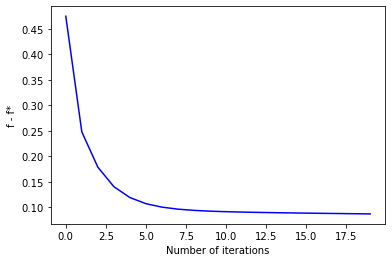

In [143]:
#Plot 

plt.plot([i for i in range(20)],[cost_history_bs[i] for i in range(20)], c = "blue")
plt.xlabel('Number of iterations')
plt.ylabel('f - f*')
plt.show()

## Accelerated gradient descent

### Nesterov Accelerated Gradient Method

In [66]:
def nesterov(X, y, theta, alpha, beta, iterations = 1500):
    m = len(y)
    cost_history = [0] * iterations
    cost_history[0] = cost_function(X, y, theta)
    nb_iter = 0 
    old_theta = theta.copy()+1
    
    for iteration in range(1, iterations):

        old_theta, theta = theta, theta - alpha*df(X,y,theta + beta * (theta - old_theta)) + beta * (theta - old_theta)
        cost = cost_function(X, y, theta)
        cost_history[iteration] = cost
        nb_iter += 1
            
    return theta, cost_history, nb_iter

coefficiant :  [-0.0, 1.212, -0.244, 0.042, -0.097]
MSE : 0.1461763456259086


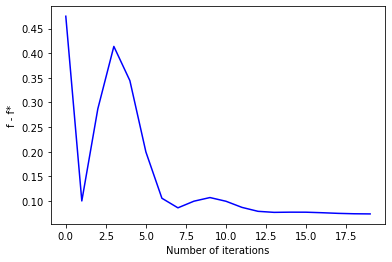

In [144]:
# Test for constant stepsize

#Initialization
# Parameters 
alpha = 1/L
beta = (np.sqrt(L) - np.sqrt(mu))/(np.sqrt(L) + np.sqrt(mu))

# GD 
theta_star_n, cost_n, nb_iter_n = nesterov(X_train,y_train,theta_o,alpha, beta, iterations =1000)
ypred_n = [X_test[i,:].dot(theta_star_n) for i in range(n_test)]

print("coefficiant : ", [round(i,3) for i in theta_star_n])
print("MSE :",mean_squared_error(ypred_n,y_test))

#Plot 

plt.plot([i for i in range(20)],[cost_n[i] for i in range(20)], c= "blue")
plt.xlabel('Number of iterations')
plt.ylabel('f - f*')
plt.show()

### Heavy Ball Method

In [145]:
def heavy_ball(X, y, theta, alpha, beta, iterations = 100):
    m = len(y)
    cost_history = [0] * iterations
    cost_history[0] = cost_function(X, y, theta)
    nb_iter = 0 
    old_theta = theta.copy()+1
    
    for iteration in range(1, iterations):

        old_theta, theta = theta, theta - alpha*df(X,y,theta) + beta * (theta - old_theta)
        cost = cost_function(X, y, theta)
        cost_history[iteration] = cost
        nb_iter += 1
            
    return theta, cost_history, nb_iter

coefficiant :  [-0.002, 1.216, -0.241, 0.045, -0.094]
MSE : 0.14634628652132992


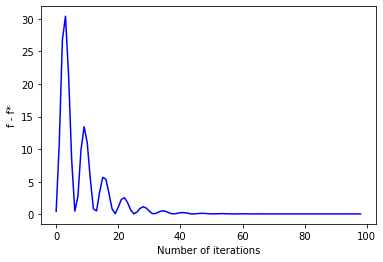

In [146]:
# Test for constant stepsize

#Initialization
alpha = 4/(np.sqrt(L) + np.sqrt(mu))**2
beta = (np.sqrt(L) - np.sqrt(mu))/(np.sqrt(L) + np.sqrt(mu))

# GD 
theta_star_hb, cost_hb, nb_iter_hb = heavy_ball(X_train,y_train,theta_o,alpha, beta)
ypred_hb = [X_test[i,:].dot(theta_star_hb) for i in range(n_test)]

print("coefficiant : ", [round(i,3) for i in theta_star_hb])
print("MSE :",mean_squared_error(ypred_hb,y_test))

#Plot 

plt.plot([i for i in range(nb_iter_hb)],[cost_hb[i] for i in range(nb_iter_hb)], c = "blue")
plt.xlabel('Number of iterations')
plt.ylabel('f - f*')
plt.show()

## Graph conclusion

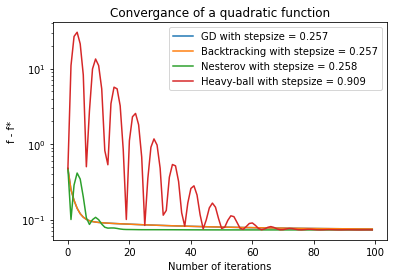

In [147]:
#nb = min(nb_iter,nb_iter_bs,nb_iter_hb,nb_iter_n)
nb = 100

# GD 
alpha_gd = 1/(L + mu)
theta_star, cost, nb_iter = gradient_descent(X_train, y_train, theta_o, alpha_gd)
plt.semilogy([i for i in range(nb)],[cost[i] for i in range(nb)],label= f"GD with stepsize = {round(alpha_gd,3)}")


# BS
alpha_bs = 1/(L+mu)
theta_bs, cost_history_bs, nb_iter_bs = gd_back(X_train, y_train, theta_o, alpha_bs, iterations = 1500)
plt.semilogy([i for i in range(nb)], [cost_history_bs[i] for i in range(nb)],
             label= f"Backtracking with stepsize = {round(alpha_bs,3)}")

# Nesterov
alpha_n = 1/L
beta_n = (np.sqrt(L) - np.sqrt(mu))/(np.sqrt(L) + np.sqrt(mu))
plt.semilogy([i for i in range(nb)], [cost_n[i] for i in range(nb)],
             label= f"Nesterov with stepsize = {round(alpha_n,3)}")


# Heavy-ball
alpha_hb = 4/(np.sqrt(L) + np.sqrt(mu))**2
beta_hb = (np.sqrt(L) - np.sqrt(mu))/(np.sqrt(L) + np.sqrt(mu))
plt.semilogy([i for i in range(nb)], [cost_hb[i] for i in range(nb)],
             label= f"Heavy-ball with stepsize = {round(alpha_hb,3)}")



plt.legend()
plt.title("Gradient descent with various stepsizes",fontsize=16)


plt.title("Convergance of a quadratic function")
plt.xlabel('Number of iterations')
plt.ylabel('f - f*')
plt.show()

## Stochastic gradient descent

In [71]:
def grad_fi(A,y,theta,i):
    return A[i,:].T* (A[i,:].dot(theta)-y[i])

In [72]:
# iteration devient epoch

def stochastic_gradient_descent(X, y, theta, alpha, iterations = 150):

    m = len(y)
    #iterations = int(np.floor(iterations * m))
    #print(iterations)
    cost_history = [0] * iterations
    cost_history[0] = cost_function(X, y, theta)
    nb_iter = 0 
    old_theta = theta.copy()+1
    
    for iteration in range(1, iterations):

            old_theta = theta.copy()
            
            index = random.randint(0, m) - 1
            old_theta, theta = theta, theta - alpha*grad_fi(X,y,theta,index)
            
            cost = cost_function(X, y, theta)
            cost_history[iteration] = cost
            nb_iter += 1
            
    return theta, cost_history, nb_iter

coefficiant :  [ 1.15528436  2.1485148   0.68950188  2.18639819 -6.35566649]
MSE : 7.371248722181873


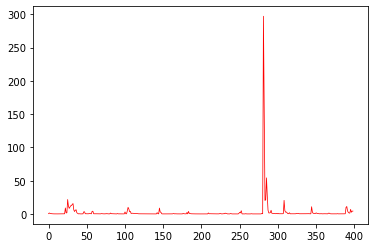

In [149]:
# SGD 
theta_star_sto, cost_sto, nb_iter_sto = stochastic_gradient_descent(X_train,y_train,theta_o,1/L,iterations = 400)
ypred_sto = [X_test[i,:].dot(theta_star_sto) for i in range(n_test)]

print("coefficiant : ", theta_star_sto)
print("MSE :",mean_squared_error(ypred_sto,y_test)) 

plt.plot([i for i in range(nb_iter_sto)],[cost_sto[i] for i in range(nb_iter_sto)], color = "red", linewidth=.75)

Plot for differente value of alpha:


Text(0.5, 0, 'Number of epoch')

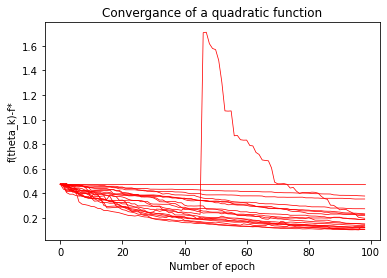

In [150]:
#Plot 
print("Plot for differente value of alpha:")
Alpha = np.linspace(0,mu-.001 ,20)

for alpha in Alpha:
    theta_star, cost, nb_iter = stochastic_gradient_descent(X_train, y_train,theta_o, alpha, iterations = 100)
    ypred = [X_test[i,:].dot(theta_star) for i in range(n_test)]
    plt.plot([i for i in range(nb_iter)],[cost[i] for i in range(nb_iter)], color = "red", linewidth=.75)


plt.title("Convergance of a quadratic function")
plt.ylabel('f(theta_k)-f*')
plt.xlabel('Number of epoch')

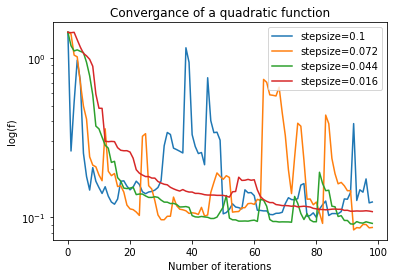

In [75]:
#Plot 
Alpha = np.linspace(0+1e-1,mu-.001 ,4)

for alpha in Alpha:
    theta_star, cost, nb_iter = stochastic_gradient_descent(X_train, y_train,theta_o, alpha, iterations = 100)
    ypred = [X_test[i,:].dot(theta_star) for i in range(n_test)]
    plt.semilogy([i for i in range(nb_iter)],[cost[i] for i in range(nb_iter)],label=f"stepsize={round(alpha,3)}")
    plt.legend()
    plt.title("Gradient descent with various stepsizes",fontsize=16)


plt.title("Convergance of a quadratic function")
plt.xlabel('Number of iterations')
plt.ylabel('log(f)')
plt.show()

## SGD vs GD

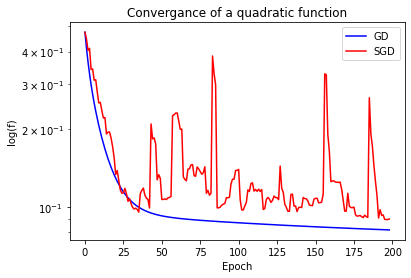

In [151]:
#nb = min(nb_iter,nb_iter_bs,nb_iter_hb,nb_iter_n)


# GD 
alpha_gd = .05
theta_star, cost, nb_iter = gradient_descent(X_train, y_train, theta_o, alpha_gd, iterations = 200)
plt.semilogy([i for i in range(nb_iter)],[cost[i] for i in range(nb_iter)],label= f"GD", c="blue")


# SGD
alpha_sgd = .05
theta_star_sto, cost_sto, nb_iter_sto = stochastic_gradient_descent(X_train, y_train, theta_o, 
                                                                    alpha_sgd, iterations = 200)


plt.semilogy([i for i in range(nb_iter_sto)], [cost_sto[i] for i in range(nb_iter_sto)],label= f"SGD", c="red")


plt.legend()
plt.title("Gradient descent with various stepsizes",fontsize=16)


plt.title("Convergance of a quadratic function")
plt.xlabel('Epoch')
plt.ylabel('log(f)')
plt.show()

# Batch Gradient Descent

In [152]:
def Batch_SG (A, y, theta, alpha, b_size, ite):
    
    n = len(y)
    n_ite = 0
    old_theta = theta + 1
    f_value = [0] * ite
    f_value[0] = cost_function(A,y,theta)
    
    for k in range(1, ite):
        S_k = random.sample(range(0,n),b_size) #Index between 0 and n
        gk = sum([grad_fi(A, y, theta, i) for i in S_k])/b_size
        old_theta, theta = theta , theta - alpha * gk 
        f_value[k]= cost_function(A,y,theta)
        n_ite +=1
                
    return theta, f_value, n_ite

coefficients :  [-0.00295013  1.16861771 -0.18182694  0.01872934 -0.12676368]
MSE : 0.14737080369134437


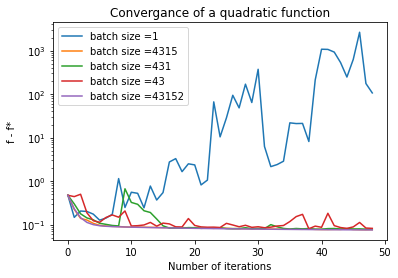

In [153]:
#Initialization
alpha = 2/L - 0.8*1e-1


# BSG 
theta_star_BSG, f_value_BSG, nb_ite_BSG = Batch_SG(X_train,y_train,theta_o,2/L - 0.5*1e-1,4315, 200)

# Prediction 
ypred_BSG = [X_test[i,:].dot(theta_star_BSG) for i in range(n_test)]

print("coefficients : ", theta_star_BSG)
print("MSE :",mean_squared_error(ypred_BSG,y_test))

#Plot 
b_size = [1, int(len(y_train)/10), int(len(y_train)/100), int(len(y_train)/1000), len(y_train)]

for b in b_size:
    theta_star, cost, nb_iter = Batch_SG(X_train, y_train, theta_o, alpha, b, 50)
    ypred = [X_test[i,:].dot(theta_star) for i in range(n_test)]
    plt.semilogy([i for i in range(nb_iter)],[cost[i] for i in range(nb_iter)],label=f"batch size ={b}")
    plt.legend()
    plt.title("Batch GD with various batch size",fontsize=16)


plt.title("Convergance of a quadratic function")
plt.xlabel('Number of iterations')
plt.ylabel('f - f*')
plt.show()

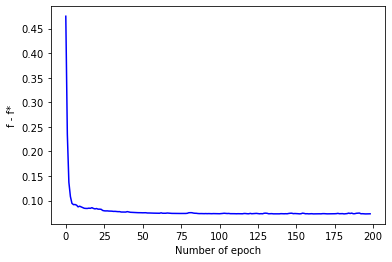

In [154]:
#Plot 
plt.plot([i for i in range(nb_ite_BSG)],[f_value_BSG[i] for i in range(nb_ite_BSG)], c = "blue")
plt.xlabel('Number of epoch')
plt.ylabel('f - f*')
plt.show()

## Iterate averaging

In [155]:
def Ite_average_SG (A,y,theta,alpha,ite):
    n = len(y)
    n_ite = 0
    theta_seq = []
    theta_seq.append(theta)
    theta_seq.append(theta+1)
    theta_mean = np.mean(theta_seq,axis=0)
    f_value = [0] * ite 
    f_value[0]= cost_function (A,y,theta_mean)
    
    for k in range (1,ite):
        index = random.randint(0, n) 
        old_theta , theta = theta , theta - alpha * grad_fi(A,y,theta,index)
        theta_seq.append(theta)
        theta_mean = np.mean(theta_seq,axis=0)
        f_value[k]= cost_function(A,y,theta_mean)
        n_ite +=1
    
    return theta_mean,f_value,n_ite

MSE : 0.17718264711648885


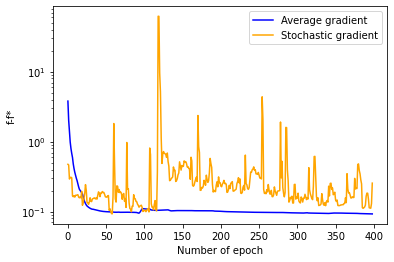

In [156]:
alpha = 1/(L+mu)


theta_star_ISG, f_value_ISG, nb_ite_ISG = Ite_average_SG(X_train,y_train,theta_o,mu + 1e-1, 400)
ypred_ISG = [X_test[i,:].dot(theta_star_ISG) for i in range(n_test)]
print("MSE :",mean_squared_error(ypred_ISG,y_test))

# GD
theta_star_sto, cost_sto, nb_iter_sto = stochastic_gradient_descent(X_train,y_train,theta_o,mu + 1e-1,iterations = 400)
ypred_sto = [X_test[i,:].dot(theta_star_sto) for i in range(n_test)]




plt.semilogy([i for i in range(nb_ite_ISG)],[f_value_ISG[i] for i in range(nb_ite_ISG)], 
             c = "blue", label=f"Average gradient")
plt.semilogy([i for i in range(nb_iter_sto)],[cost_sto[i] for i in range(nb_iter_sto)], 
             c = "orange", label=f"Stochastic gradient")
plt.legend()
plt.xlabel('Number of epoch')
plt.ylabel('f-f*')
plt.show()

## Graph comparaison averaging vs sto

Text(0, 0.5, 'f -f*')

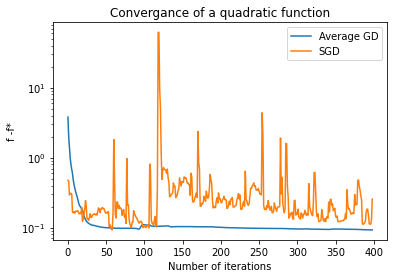

In [157]:
plt.semilogy([i for i in range(nb_ite_ISG)],[f_value_ISG[i] for i in range(nb_ite_ISG)],
             label=f"Average GD")

plt.semilogy([i for i in range(nb_iter_sto)],[cost_sto[i] for i in range(nb_iter_sto)],
             label=f"SGD")



plt.legend()

plt.title("Convergance of a quadratic function")
plt.xlabel('Number of iterations')
plt.ylabel('f -f*')

# Ridge Regression
## Analytical solution

In [158]:
def ridge_reg(A,y,d, Lambda):
    return(np.linalg.solve( A.T.dot(A) + Lambda*np.eye(d), A.T.dot(y)))

d=5

theta_star_ridge = ridge_reg(X_train,y_train,d,1)

# prediction 

y_pred_ridge = [X_test[i,:].dot(theta_star_ridge) for i in range(n_test)]

print("coefficient : ", theta_star_ridge)
print("MSE :",mean_squared_error(y_pred_ridge,y_test))

coefficient :  [-1.43507937e-14  1.21143048e+00 -2.42846869e-01  4.19111915e-02
 -9.73161810e-02]
MSE : 0.14617779716999377


0.001
relative prediction error for Ridge with optimal lambda = 167.3for an error of : 0.3832948983375398


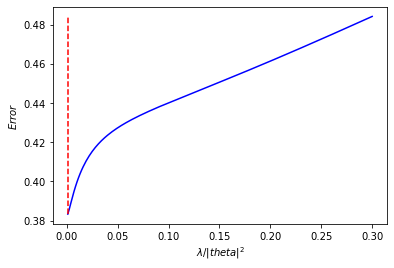

In [159]:
q=200
lmax = np.linalg.norm(X_train,2)**2
lambda_list = lmax*np.linspace(.3,1e-3,q)
Theta = np.zeros((X_train.shape[1],q))
E = np.zeros((q,1))
for i in np.arange(0,q):
  Lambda = lambda_list[i]
  theta = np.linalg.solve(X_train.transpose().dot(X_train) + Lambda*np.eye(X_train.shape[1]),X_train.transpose().dot(y_train))
  Theta[:,i] = theta.flatten()
  E[i] = np.linalg.norm(X_test.dot(theta)-y_test)/np.linalg.norm(y_test)

# Find optimal lambda

i = E.argmin()

lambda0 = lambda_list[i]
theta_ridge = Theta[:,i]

print(lambda0/lmax)

print("relative prediction error for Ridge with optimal lambda = " + str(round(lambda0,1))+ "for an error of : "+str(E.min()))

# Display error evolution 

plt.clf
plt.plot(lambda_list/lmax,E, color = "blue")
plt.plot([lambda0/lmax,lambda0/lmax],[E.min(),E.max()], "r--")
plt.axis("tight")
plt.xlabel("$\lambda / |theta|^2$")
plt.ylabel("$Error$")

plt.savefig("error_ridge.png")
plt.show()

### ISTA

In [87]:
def f_lasso(A,y,theta,Lambda):
    return (1/2)*np.linalg.norm(A.dot(theta)-y)**2 + Lambda*np.linalg.norm(theta,1)

def Soft(x,Lambda): return np.maximum(abs(x)-Lambda, np.zeros(x.shape)) * np.sign(x)

def ISTA (A,y, theta, Lambda, tau, ite):
    f_value =[f_lasso(A, y, theta, Lambda)]
    nb_ite = 0
    theta_old = theta + 1 
    
    for k in range (1,ite) : 
        
        theta_old, theta = theta, Soft(theta - tau*np.dot(A.T, np.dot(A,theta) - y), Lambda * tau)
        f_value.append(f_lasso(A, y, theta, Lambda)) 
        nb_ite +=1
            
    return theta, f_value, nb_ite

coefficient :  [-0.          0.76449077  0.          0.0567551   0.        ]
MSE : 0.16356241080564252


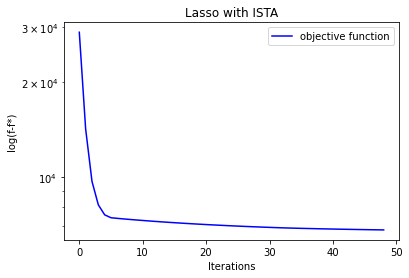

In [160]:
# Initialization 
tau_lasso = 1.5/np.linalg.norm(X_train,2)**2
lmax = abs(X_train.transpose().dot(y_train)).max()
Lambda = lmax/10

# Lasso with ISTA
theta_star_L, f_value_L, nb_ite_L = ISTA(X_train,y_train,theta_o,Lambda,tau_lasso,50)

#Plot 

plt.semilogy([i for i in range(nb_ite_L)],[f_value_L[i] for i in range(nb_ite_L)],
             label=f"objective function", c= "blue")

plt.legend()

plt.title("Lasso with ISTA")
plt.xlabel('Iterations')
plt.ylabel('log(f-f*)')
plt.show

# Prediction 
ypred_Lasso = [X_test[i,:].dot(theta_star_L) for i in range(n_test)]

print("coefficient : ", theta_star_L)

print("MSE :",mean_squared_error(ypred_Lasso,y_test))

0.001
relative prediction error for Ridge with optimal lambda=167.3:0.3935914215408392


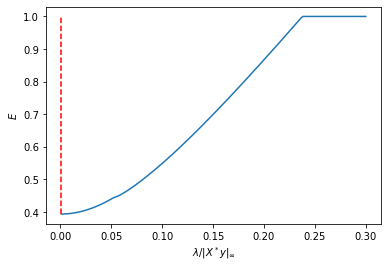

In [162]:
q=200
lmax = np.linalg.norm(X_train,2)**2
lambda_list = lmax*np.linspace(.3,1e-3,q)
Theta = np.zeros((X_train.shape[1],q))
E = np.zeros((q,1))
n_iter = 5
for iq in np.arange(0,q):
    Lambda = lambda_list[iq]
    # ISTA
    for i in np.arange(0,n_iter):
        theta,f,n = ISTA(X_train,y_train,theta_o,Lambda,tau_lasso,50)
    Theta[:,iq] = theta.flatten()
    E[iq] = np.linalg.norm(X_test.dot(theta)-y_test)/np.linalg.norm(y_test)

# Find optimal lambda

i = E.argmin()

lambda0 = lambda_list[i]
theta_lasso = Theta[:,i]

print(lambda0/lmax)

print("relative prediction error for Ridge with optimal lambda=" + str(round(lambda0,1))+ ":"+str(E.min()))

# Display error evolution 

plt.clf
plt.plot(lambda_list/lmax,E)
plt.plot([lambda0/lmax,lambda0/lmax],[E.min(),E.max()], "r--")
plt.axis("tight")
plt.xlabel("$\lambda / |X^* y|_\infty$")
plt.ylabel("$E$")
plt.show()